In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Отчет по задачам по дисциплине Суперкомпьютерные Вычисления

## OpenMP

### Задача 1

**Директива #pragma omp parallel**
- Создает группу (пул) потоков, которые выполняют код внутри блока.
- Каждый поток выполняет код внутри блока параллельно. Если не указано количество потоков, используется настройка по умолчанию (например, из переменной окружения OMP_NUM_THREADS). При запуске задачи использовалось 8 потоков.

**Директива #pragma omp for**
- Делит итерации цикла между потоками для параллельного выполнения.
- Каждый поток получает определенное количество итераций для выполнения. Это обеспечивает распределение работы между потоками.

**Директива #pragma omp critical**
- Гарантирует, что только один поток выполняет код внутри блока одновременно.
- Этот блок используется для синхронизации доступа к общим данным, чтобы избежать состояния гонки.

**Директива #pragma omp parallel for**
- Объединяет директивы parallel и for, создавая параллельные потоки и распределяя итерации цикла между ними.
- Код цикла сразу становится параллельным. Эта директива удобна для сокращения кода.

**reduction**
- Обеспечивает безопасное объединение значений, вычисляемых потоками, в одну переменную.
- Каждый поток создает локальную копию переменной (например, min_val или max_val) для вычислений. После завершения вычислений локальные копии объединяются с использованием указанной операции (например, min или max).

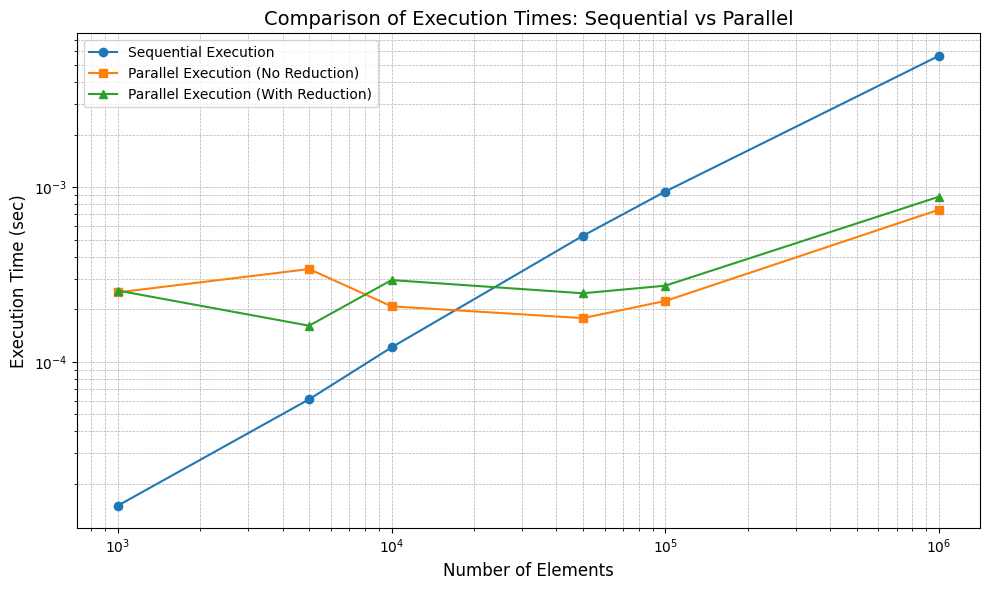

In [3]:
# Data setup
elements = np.array([1000, 5000, 10000, 50000, 100000, 1000000])

# Hypothetical execution times in seconds (y-axis)
seq_execution_time = np.array([1.5e-05, 6.1e-05, 0.000121, 0.000527, 0.000945, 0.005664,])  # Sequential execution
parallel_no_reduction_time = np.array([0.00025, 0.00034, 0.000208, 0.000178, 0.000223, 0.000744,])  # Parallel without reduction
parallel_with_reduction_time = np.array([0.000256, 0.000161, 0.000294, 0.000247, 0.000273, 0.000883,])  # Parallel with reduction

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(elements, seq_execution_time, label="Sequential Execution", marker="o")
plt.plot(elements, parallel_no_reduction_time, label="Parallel Execution (No Reduction)", marker="s")
plt.plot(elements, parallel_with_reduction_time, label="Parallel Execution (With Reduction)", marker="^")

# Customize plot
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Elements", fontsize=12)
plt.ylabel("Execution Time (sec)", fontsize=12)
plt.title("Comparison of Execution Times: Sequential vs Parallel", fontsize=14)
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

**Вывод**
- *Последовательный алгоритм* самый простой метод, но становится очень медленным с увеличение количества элементов
- *Алгоритм с редукцией* самый быстрый метод, из-за меньшей задержки при синхронизации
- *Алгоритм без редукции* работает медленне метода с редукцией, из-за использования `critical`

### Задача 2

**reduction(+:result)**
- Редукция обеспечивает безопасное объединение результатов вычислений, которые выполняются в разных потоках.
- Каждый поток создает свою локальную копию переменной result для предотвращения состояния гонки. В конце выполнения цикла OpenMP аккуратно объединяет эти локальные копии с использованием операции сложения.

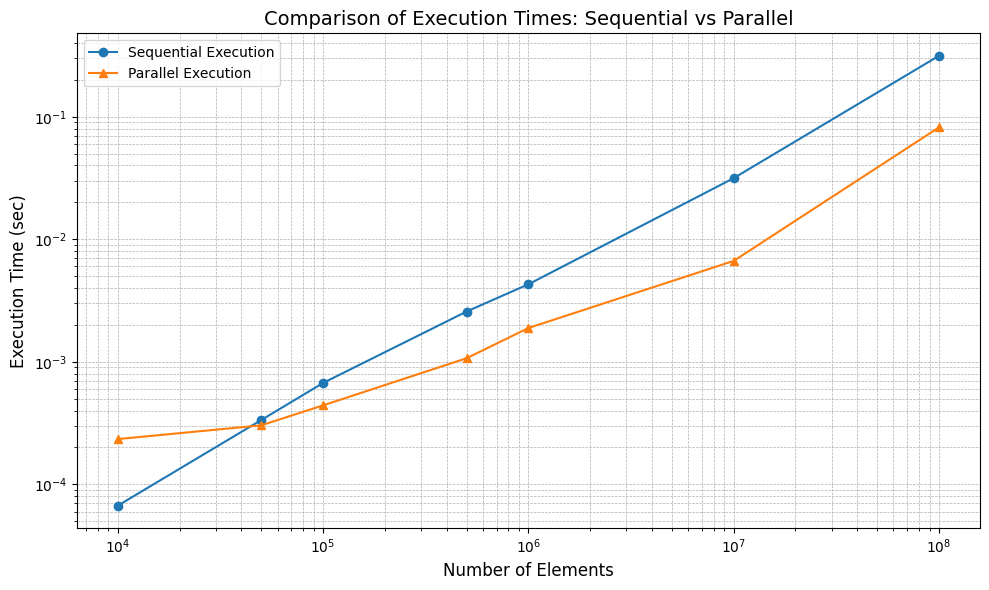

In [4]:
# Data setup
elements = np.array([10000, 50000, 100000, 500000, 1000000, 10000000, 100000000])

# Hypothetical execution times in seconds (y-axis)
seq_execution_time = np.array([6.7e-05, 0.000335, 0.000672, 0.002572, 0.00429, 0.031519, 0.313989])  # Sequential execution
parallel_with_reduction_time = np.array([0.000234, 0.000303, 0.000441, 0.001069, 0.001886, 0.006656, 0.081825])  # Parallel with reduction

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(elements, seq_execution_time, label="Sequential Execution", marker="o")
plt.plot(elements, parallel_with_reduction_time, label="Parallel Execution", marker="^")

# Customize plot
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Elements", fontsize=12)
plt.ylabel("Execution Time (sec)", fontsize=12)
plt.title("Comparison of Execution Times: Sequential vs Parallel", fontsize=14)
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

**Вывод**
- *Последовательный алгоритм* простой в реализации метод, но становится очень медленным с увеличением количества элементов
- *Параллельный алгоритм* не эффеткивен при малом количестве элементов из-за задержки при управлении потоками. При большом количестве элементов он становится намного эффективнее последовательного алгоритма.

### Задача 3

**reduction(+:integral)**
- Редукция обеспечивает безопасное объединение результатов вычислений, которые выполняются в разных потоках.
- Каждый поток создает свою локальную копию переменной result для предотвращения состояния гонки. В конце выполнения цикла OpenMP аккуратно объединяет эти локальные копии с использованием операции сложения.

В тестировании используется функция x^3 с интервалом [0, 100000]

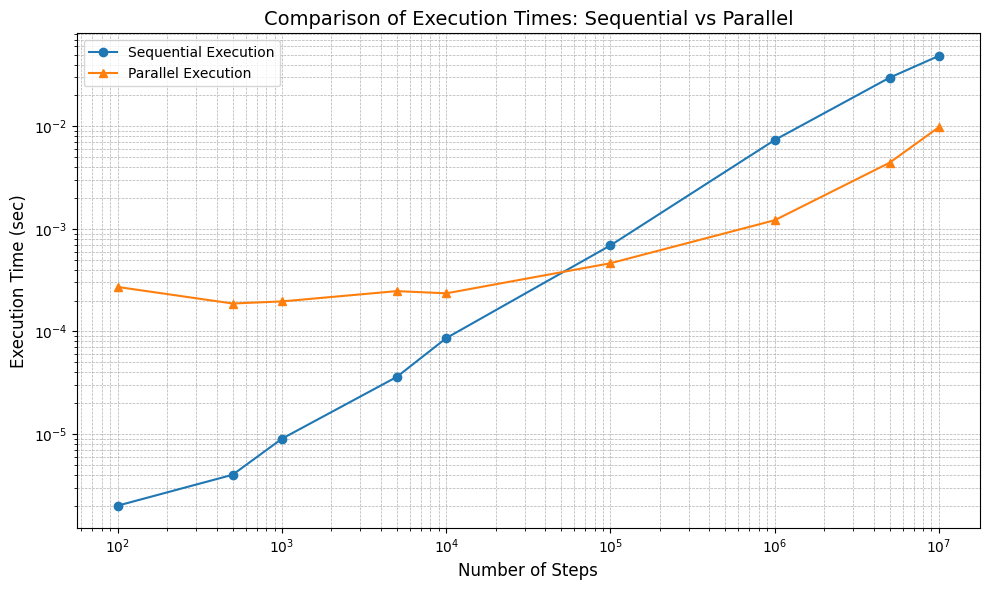

In [5]:
# Data setup
elements = np.array([100, 500, 1000, 5000, 10000, 100000, 1000000, 5000000, 10000000])

# Hypothetical execution times in seconds (y-axis)
seq_execution_time = np.array([2e-06, 4e-06, 9e-06, 3.6e-05, 8.6e-05, 0.00069, 0.007344, 0.029737, 0.048624])  # Sequential execution
parallel_with_reduction_time = np.array([0.000271, 0.000187, 0.000196, 0.000247, 0.000235, 0.000462, 0.001213, 0.004408, 0.009804])  # Parallel with reduction

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(elements, seq_execution_time, label="Sequential Execution", marker="o")
plt.plot(elements, parallel_with_reduction_time, label="Parallel Execution", marker="^")

# Customize plot
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Steps", fontsize=12)
plt.ylabel("Execution Time (sec)", fontsize=12)
plt.title("Comparison of Execution Times: Sequential vs Parallel", fontsize=14)
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

**Вывод**
- *Последовательный алгоритм* простой в реализации метод, но время выполнение сильно растет с увеличением количества шагов.
- *Параллельный алгоритм* с увеличением количества шагов в алгоритме становится значительно эффективнее, чем последовательный алгоритм. Если требуется большая точность в вычислении интеграла, соответственно большее количество шагов в вычислении, то последовательный алгоритм справится быстрее.

### Задача 4

**reduction(max:max_min)**
- Редукция обеспечивает безопасное объединение результатов вычислений, которые выполняются в разных потоках.
- Каждый поток создает свою локальную копию переменной max_min. Далее в каждом потоке последовательно высчитываются минимумы каждой строки и результаты аккуратно обхединяются выбором максимального элемента.

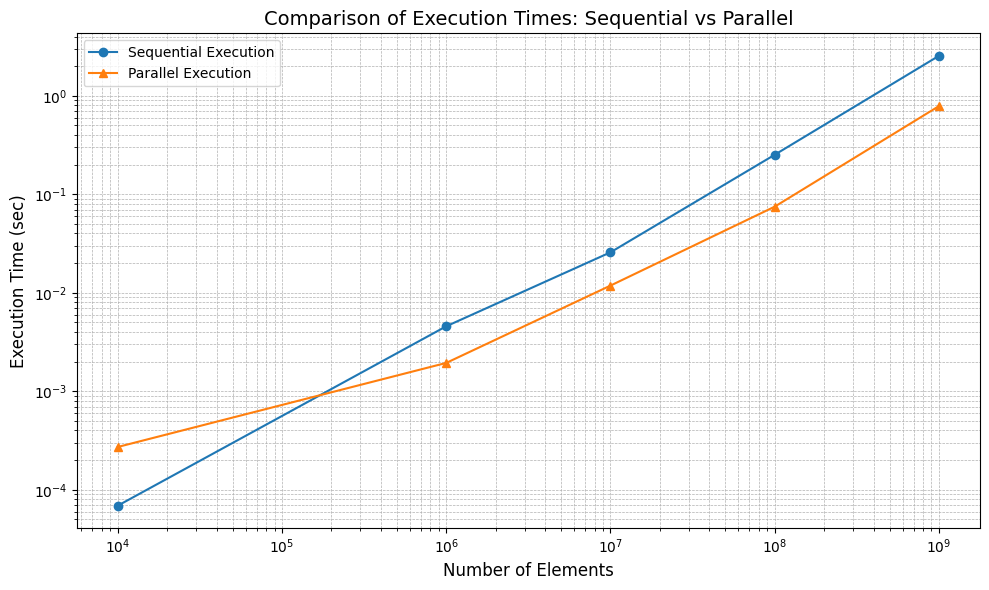

In [6]:
# Data setup
elements = np.array([100*100, 1000*1000, 10000*1000, 10000*10000, 100000*10000,])

# Hypothetical execution times in seconds (y-axis)
seq_execution_time = np.array([6.9e-5, 0.004571, 0.025757, 0.252027, 2.54639,])  # Sequential execution
parallel_with_reduction_time = np.array([0.000272, 0.001941, 0.011832, 0.074922, 0.786243,])  # Parallel with reduction

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(elements, seq_execution_time, label="Sequential Execution", marker="o")
plt.plot(elements, parallel_with_reduction_time, label="Parallel Execution", marker="^")

# Customize plot
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of Elements", fontsize=12)
plt.ylabel("Execution Time (sec)", fontsize=12)
plt.title("Comparison of Execution Times: Sequential vs Parallel", fontsize=14)
plt.legend()
plt.grid(which="both", linestyle="--", linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

In [9]:
size = ['100x100', '1000x1000', '10000x1000', '10000x10000', '100000x10000']

# Hypothetical execution times in seconds (y-axis)
seq_execution_time = np.array([6.9e-5, 0.004571, 0.025757, 0.252027, 2.54639,])  # Sequential execution
parallel_time = np.array([0.000272, 0.001941, 0.011832, 0.074922, 0.786243,])  # Parallel with reduction

speedup = [seq / par for seq, par in zip(seq_execution_time, parallel_time)]

# Create a DataFrame for better visualization
data = pd.DataFrame({
    "Matrix Size": size,
    "Sequential Time (s)": seq_execution_time,
    "Parallel Time (s)": parallel_time,
    "Speedup": speedup
})

data

,Matrix Size,Sequential Time (s),Parallel Time (s),Speedup
0,100x100,0.000069,0.000272,0.253676
1,1000x1000,0.004571,0.001941,2.354972
2,10000x1000,0.025757,0.011832,2.176893
3,10000x10000,0.252027,0.074922,3.363858
4,100000x10000,2.546390,0.786243,3.238681


**Вывод**
- *Последовательный алгоритм* простой в реализации метод, но становится медленнее с увеличением размера матрицы.
- *Параллельный алгоритм* с увеличением количества шагов в алгоритме становится значительно эффективнее, чем последовательный алгоритм. Как видно из таблицы, ускорение может быть в 3 раза.

### Задача 5

**reduction(max:max_min)**
- Редукция обеспечивает безопасное объединение результатов вычислений, которые выполняются в разных потоках.
- Каждый поток создает свою локальную копию переменной max_min. Далее в каждом потоке последовательно высчитываются минимумы каждой строки и результаты аккуратно обхединяются выбором максимального элемента.<br>

**schedule(runtime)**
- Устанавливается с помощью функции **omp_set_schedule**
- **static** - итерации цикла распределяются между потоками заранее (до выполнения) равномерно и последовательно.
- **dynamic** - итерации цикла распределяются динамически во время выполнения. Поток, завершивший свою текущую порцию работы, получает следующую.
- **guided** - итерации сначала распределяются большими блоками, которые уменьшаются по мере выполнения. Это снижает накладные расходы по сравнению с **dynamic**, сохраняя его адаптивность.

Для ленточных матриц использовалось ширина ленты равная 10

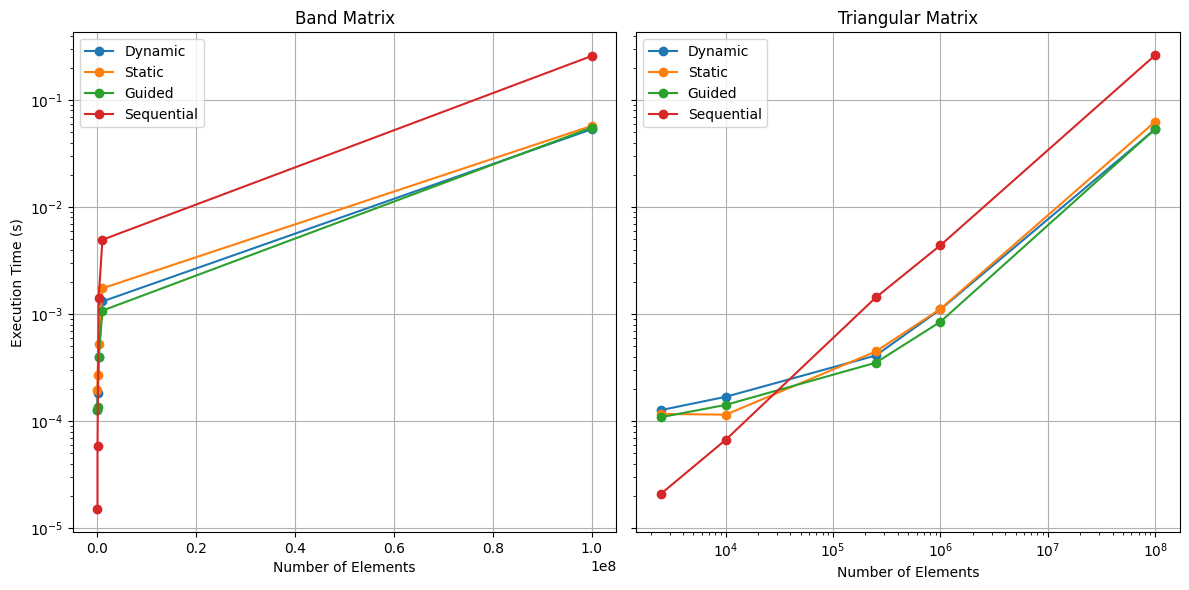

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Примерные данные
matrix_sizes = np.array([50*50, 100*100, 500*500, 1000*1000, 10000*10000])  # Размеры матриц

# Время выполнения для ленты
band_dynamic = np.array([0.000128, 0.000183, 0.000402, 0.001314, 0.053349])
band_static = np.array([0.000196, 0.000268, 0.000529, 0.001743, 0.057326])
band_guided = np.array([0.000126, 0.000135, 0.000394, 0.001079, 0.055282])
band_sequential = np.array([1.5e-5, 5.9e-5, 0.001418, 0.004951, 0.257955])

# Время выполнения для треугольной
tri_dynamic = np.array([0.000127, 0.000169, 0.000411, 0.001107, 0.053424])
tri_static = np.array([0.000117, 0.000115, 0.000448, 0.00112, 0.062902])
tri_guided = np.array([0.000109, 0.000142, 0.000352, 0.000849, 0.053887])
tri_sequential = np.array([2.1e-05, 6.7e-5, 0.001431, 0.004402, 0.263026])

# Создание графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plt.xscale("log")
plt.yscale("log")

# График для ленточной матрицы
axes[0].plot(matrix_sizes, band_dynamic, label="Dynamic", marker="o")
axes[0].plot(matrix_sizes, band_static, label="Static", marker="o")
axes[0].plot(matrix_sizes, band_guided, label="Guided", marker="o")
axes[0].plot(matrix_sizes, band_sequential, label="Sequential", marker="o")
axes[0].set_title("Band Matrix")
axes[0].set_xlabel("Number of Elements")
axes[0].set_ylabel("Execution Time (s)")
axes[0].legend()
axes[0].grid(True)

# График для треугольной матрицы
axes[1].plot(matrix_sizes, tri_dynamic, label="Dynamic", marker="o")
axes[1].plot(matrix_sizes, tri_static, label="Static", marker="o")
axes[1].plot(matrix_sizes, tri_guided, label="Guided", marker="o")
axes[1].plot(matrix_sizes, tri_sequential, label="Sequential", marker="o")
axes[1].set_title("Triangular Matrix")
axes[1].set_xlabel("Number of Elements")
axes[1].legend()
axes[1].grid(True)

# Показываем графики
plt.tight_layout()
plt.show()

**Вывод**
- Исходя из графиков видно, что для Ленточных Матриц **guided** справляется быстрее, но с увеличением количества элементов разница между подходами не так высока
- Для Треугольных Матриц **guided** и **dynamic** справляются немного лучше, чем **static**

### Задача 6

**schedule(runtime)**
- Устанавливается с помощью функции **omp_set_schedule**
- **static** - итерации цикла распределяются между потоками заранее (до выполнения) равномерно и последовательно.
- **dynamic** - итерации цикла распределяются динамически во время выполнения. Поток, завершивший свою текущую порцию работы, получает следующую.
- **guided** - итерации сначала распределяются большими блоками, которые уменьшаются по мере выполнения. Это снижает накладные расходы по сравнению с **dynamic**, сохраняя его адаптивность.


В моем случае на каждой итерации выполняется случайное количество (от 1 до 1000) операций присваивания вида: <br>
result += sin(i) + cos(i), где i - номер текущей операции

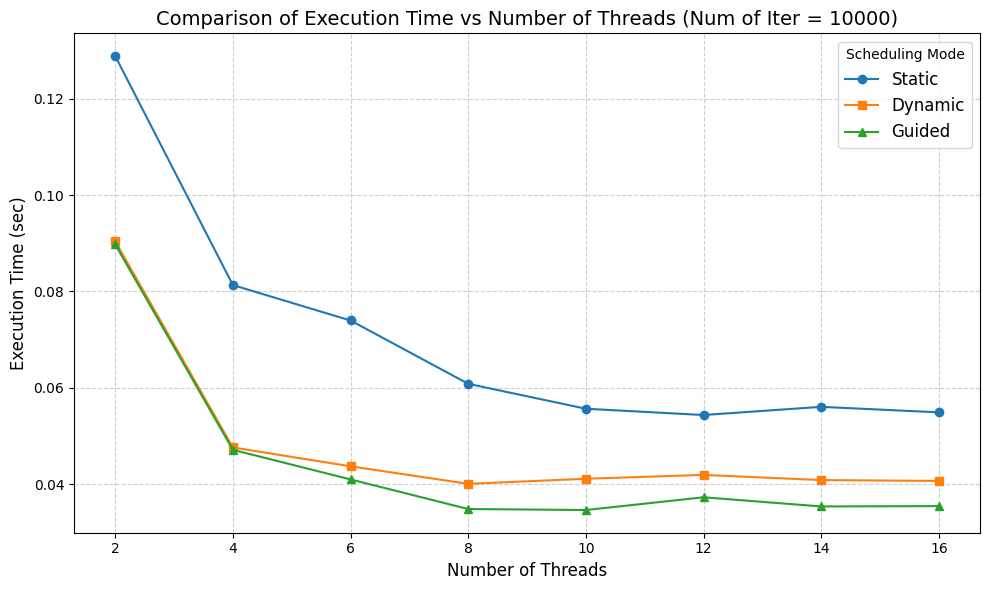

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Пример данных
threads = [2, 4, 6, 8, 10, 12, 14, 16]
time_static = [0.128826, 0.081329, 0.073986, 0.060861, 0.055687, 0.054384, 0.056081, 0.054936]   # Время выполнения для режима static
time_dynamic = [0.090409, 0.047658, 0.043751, 0.040111, 0.041166, 0.041968, 0.040892, 0.040716]  # Время выполнения для режима dynamic
time_guided = [0.089769, 0.047168, 0.04103, 0.034891, 0.034684, 0.037325, 0.035425, 0.035497] # Время выполнения для режима guided

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(threads, time_static, marker='o', label='Static')
plt.plot(threads, time_dynamic, marker='s', label='Dynamic')
plt.plot(threads, time_guided, marker='^', label='Guided')

# Настройки графика
plt.title('Comparison of Execution Time vs Number of Threads (Num of Iter = 10000)', fontsize=14)
plt.xlabel('Number of Threads', fontsize=12)
plt.ylabel('Execution Time (sec)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Scheduling Mode", fontsize=12)
plt.xticks(threads)

# Показать график
plt.tight_layout()
plt.show()


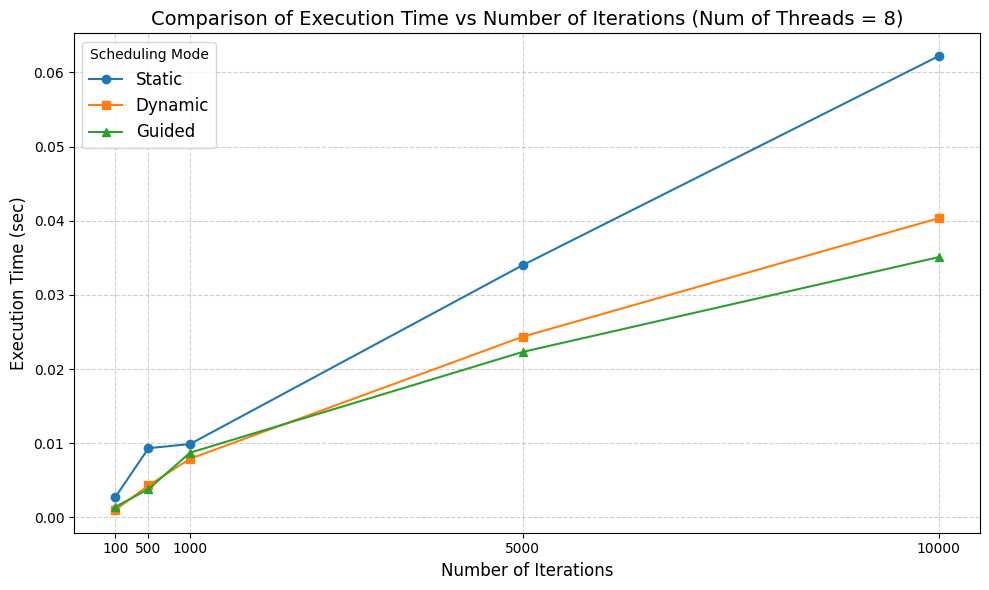

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Пример данных
threads = [100, 500, 1000, 5000, 10000]
time_static = [0.00272, 0.009337, 0.009903, 0.034018, 0.062193]   # Время выполнения для режима static
time_dynamic = [0.001007, 0.004321, 0.007921, 0.024372, 0.040336]  # Время выполнения для режима dynamic
time_guided = [0.001415, 0.003831, 0.008736, 0.022318, 0.035091] # Время выполнения для режима guided

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(threads, time_static, marker='o', label='Static')
plt.plot(threads, time_dynamic, marker='s', label='Dynamic')
plt.plot(threads, time_guided, marker='^', label='Guided')

# Настройки графика
plt.title('Comparison of Execution Time vs Number of Iterations (Num of Threads = 8)', fontsize=14)
plt.xlabel('Number of Iterations', fontsize=12)
plt.ylabel('Execution Time (sec)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Scheduling Mode", fontsize=12)
plt.xticks(threads)

# Показать график
plt.tight_layout()
plt.show()


**Вывод**
- По графикам можно сделать вывод, что режим **static** справляется хуже двух других для циклов с неравномерной нагрузкой.
- При запуске более 8 потоков время выполнения опреаций не уменьшается, что скорее всего связано с используемым железом (процессор Apple Silicon M1, 8 ядер)
- Также при использовании 2 и 4 ядер время выполнения режимов **dynamic** и **guided** не сильно отличалось. Также время выполения не сильно отличается при запуске небольшого количество итераций (100-1000).
- Итого самую производительную работу показал режим **guided**, значит данный режим лучше всегод может подходить для итераций с неравномерной нагрузкой.

### Задача 7

**#pragma omp parallel for**
- Итерации цикла распределяются между потоками.
- Каждый поток выполняет свою часть итераций.
  
**#pragma omp atomic**
- Гарантирует, что операции записи/чтения переменной завершатся без вмешательства других потоков.
- Эффективнее, чем критические секции, поскольку не требует полной блокировки.

**#pragma omp critical**
- Все потоки пытаются войти в критическую секцию, но только один поток может находиться внутри одновременно.
- Обеспечивает эксклюзивный доступ к ресурсу, но может вызывать задержки из-за блокировки.

**omp_lock_t**
- Замок (omp_lock_t) позволяет одному потоку заблокировать ресурс, пока он его использует.
- Другие потоки ждут, пока замок не освободится.

**#pragma omp parallel for reduction(+:sum)**
- Каждый поток создает свою локальную копию переменной (sum).
- После завершения всех итераций локальные копии объединяются с использованием указанной операции (в данном случае +).

В моем случае каждый алгоритм совершает суммирование всех элементов в векторе

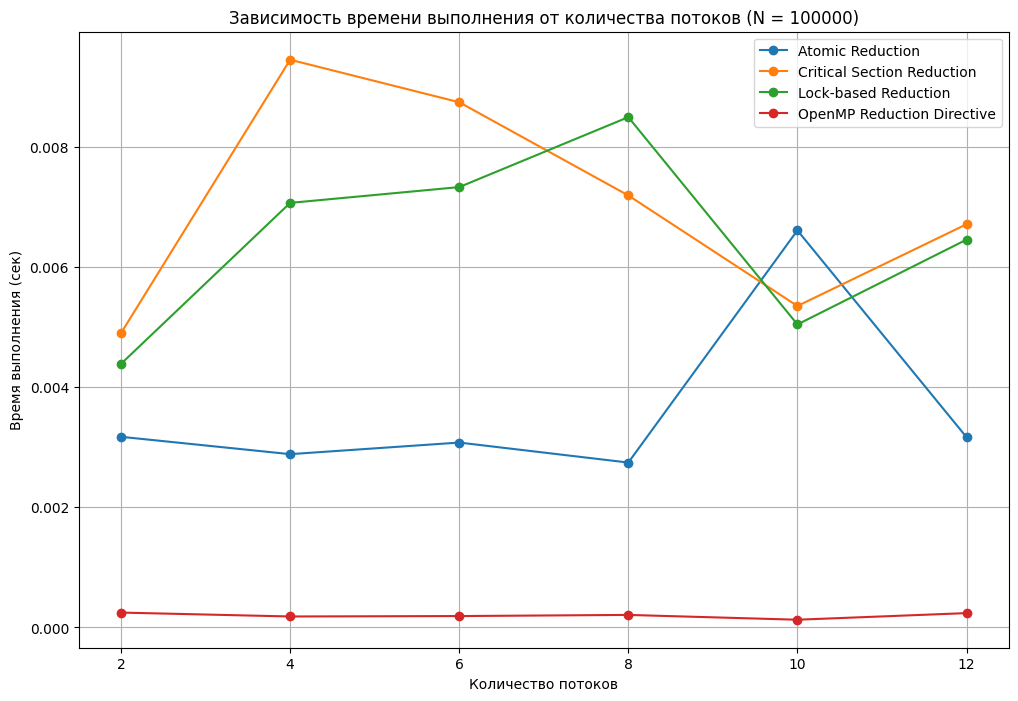

In [2]:
import matplotlib.pyplot as plt

# Данные из эксперимента
threads = [2, 4, 6, 8, 10, 12]
atomic_times = [0.003175, 0.002886, 0.003079, 0.002746, 0.006612, 0.003169]
critical_section_times = [0.004902, 0.009454, 0.008746, 0.007194, 0.005353, 0.006714]
lock_based_times = [0.00439, 0.00707, 0.007333, 0.008498, 0.005046, 0.006458]
openmp_times = [0.000248, 0.000183, 0.00019, 0.000209, 0.000129, 0.000239]

# Создание графика
plt.figure(figsize=(12, 8))
plt.plot(threads, atomic_times, marker='o', label='Atomic Reduction')
plt.plot(threads, critical_section_times, marker='o', label='Critical Section Reduction')
plt.plot(threads, lock_based_times, marker='o', label='Lock-based Reduction')
plt.plot(threads, openmp_times, marker='o', label='OpenMP Reduction Directive')

# Настройки графика
plt.title('Зависимость времени выполнения от количества потоков (N = 100000)')
plt.xlabel('Количество потоков')
plt.ylabel('Время выполнения (сек)')
plt.grid(True)
plt.legend()

# Отображение графика
plt.show()


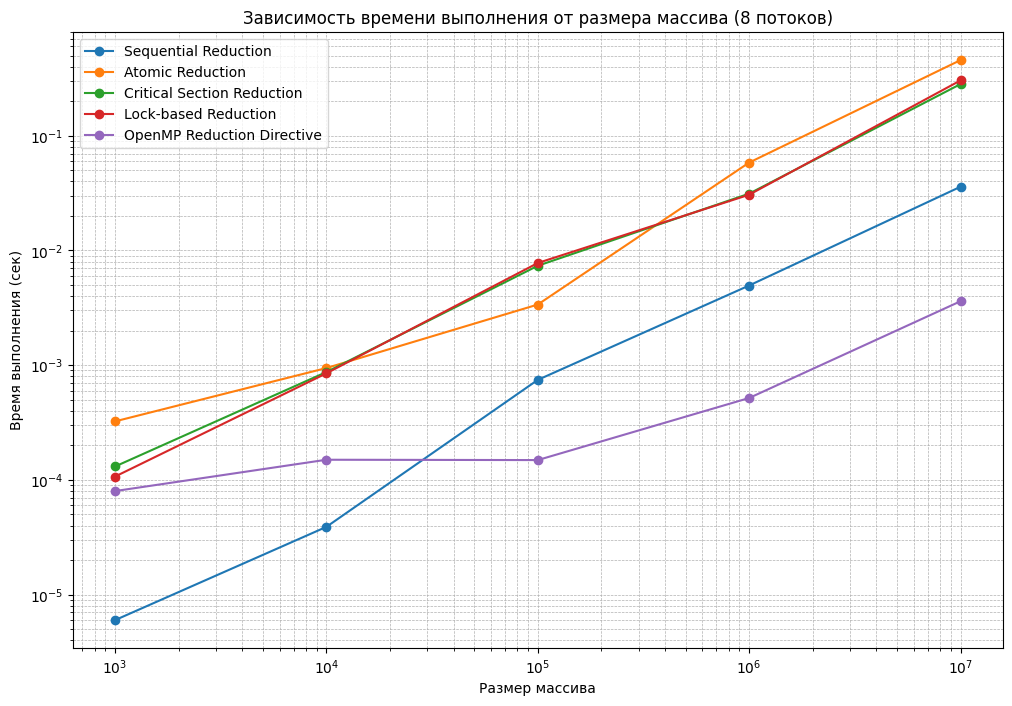

In [4]:
import matplotlib.pyplot as plt

# Данные из эксперимента
sizes = [1000, 10000, 100000, 1000000, 10000000]
sequential_times = [6e-06, 3.9e-05, 0.000745, 0.004952, 0.035937]
atomic_times = [0.000324, 0.000945, 0.003379, 0.058378, 0.456408]
critical_section_times = [0.000131, 0.000872, 0.007359, 0.031285, 0.282061]
lock_based_times = [0.000107, 0.00085, 0.007779, 0.030629, 0.303591]
openmp_times = [8e-05, 0.00015, 0.000149, 0.000518, 0.00361]

# Создание графика
plt.figure(figsize=(12, 8))
plt.plot(sizes, sequential_times, marker='o', label='Sequential Reduction')
plt.plot(sizes, atomic_times, marker='o', label='Atomic Reduction')
plt.plot(sizes, critical_section_times, marker='o', label='Critical Section Reduction')
plt.plot(sizes, lock_based_times, marker='o', label='Lock-based Reduction')
plt.plot(sizes, openmp_times, marker='o', label='OpenMP Reduction Directive')

# Настройки графика
plt.title('Зависимость времени выполнения от размера массива (8 потоков)')
plt.xlabel('Размер массива')
plt.ylabel('Время выполнения (сек)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Отображение графика
plt.show()


**Вывод**
- Методы, требующие синхронизации (Atomic, Critical Section, Lock-based), сталкиваются с ограничениями масштабируемости из-за задержек, вызванных конкуренцией потоков.
- В сравнении с редукцией атомарные операции, критические секции, синхронизацию при помощи замков выполняются медленнее при любом количестве ядер. Также они выполняются медленнее, чем последовательный метод.
- При увеличении количества ядер время выполнения алгоритмов не сильно изменяется.
- Для небольшого количества потоков можно использовать Atomic Reduction или Lock-based Reduction, так как их накладные расходы минимальны.
- Для больших размеров массива и большого количества потоков наиболее эффективен метод OpenMP Reduction Directive.
- Методы с использованием критической секции (Critical Section Reduction) следует избегать, так как они плохо масштабируются и неэффективны при высокой конкуренции между потоками.

### Задача 8

**#pragma omp parallel sections**
- Эта директива используется для разделения кода на независимые секции, которые могут быть выполнены параллельно разными потоками.
- В данном случае организована секция, где выполняется основная работа с вычислениями. Если бы было несколько задач, их можно было бы разместить в отдельных секциях.

**#pragma omp section**
- Указывает начало отдельной секции внутри #pragma omp parallel sections.
- Каждая секция выполняется одним потоком, поэтому код внутри секций должен быть независимым.

**#pragma omp parallel for**
- Эта директива используется для распараллеливания цикла.
- В данном случае она распараллеливает цикл, в котором вычисляются скалярные произведения для каждого из пар векторов.


В данной реализации случайно генерируется некоторое количество векторов заданной размерности

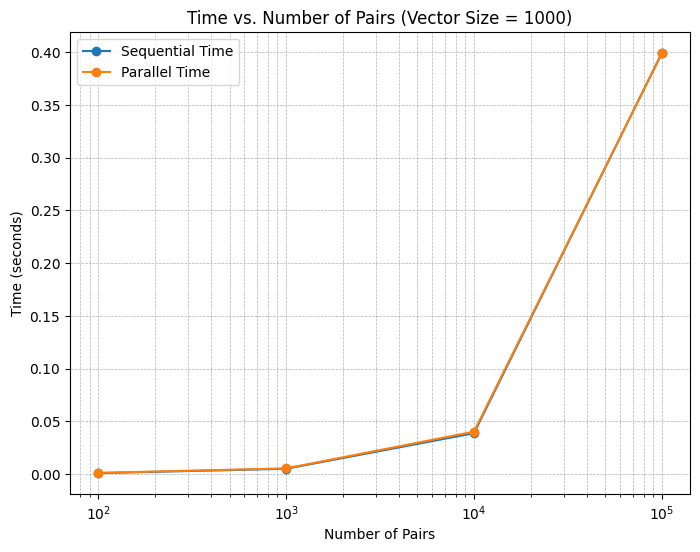

In [5]:
import matplotlib.pyplot as plt

# Данные
num_pairs_new = [100, 1000, 10000, 100000]
seq_times_new = [0.000759, 0.004875, 0.038625, 0.399168]
par_times_new = [0.000971, 0.005238, 0.040087, 0.39904]

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(num_pairs_new, seq_times_new, label="Sequential Time", marker="o")
plt.plot(num_pairs_new, par_times_new, label="Parallel Time", marker="o")
plt.xscale("log")  # Логарифмическая шкала для оси X
plt.title("Time vs. Number of Pairs (Vector Size = 1000)")
plt.xlabel("Number of Pairs")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


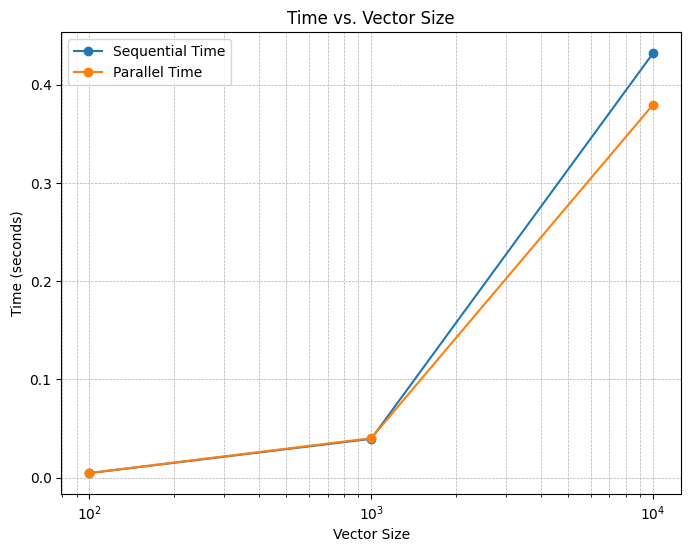

In [6]:
import matplotlib.pyplot as plt

# Данные для времени от размера вектора
vector_sizes = [100, 1000, 10000]
seq_times_vs = [0.004598, 0.039525, 0.432083]
par_times_vs = [0.004763, 0.040165, 0.379675]

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(vector_sizes, seq_times_vs, label="Sequential Time", marker="o")
plt.plot(vector_sizes, par_times_vs, label="Parallel Time", marker="o")
plt.xscale("log")  # Логарифмическая шкала для оси X
plt.title("Time vs. Vector Size")
plt.xlabel("Vector Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


**Вывод**
- При увеличении размера вектора (например, для 10,000) параллельные вычисления начинают выигрывать по времени по сравнению с последовательными.
- При малых размерах вектора (100 и 1,000) время параллельного выполнения почти равно или немного больше последовательного. Это объясняется накладными расходами на распараллеливание.
- Параллельное выполнение имеет преимущество при большом количестве пар, но разница минимальна, так как размер вектора фиксирован (1000). Это указывает, что преимущество параллельных вычислений проявляется при больших объемах данных.
- Для малых объемов данных предпочтительнее последовательные вычисления.
- Для больших объемов данных параллельное выполнение начинает показывать свою эффективность.

### Задача 9

Алгоритм с вложенным распараллеливанием реализован с помощью двух директив:
- **#pragma omp parallel for reduction(max : maxMin)** для поиска максимума среди минимумов строк
- **#pragma omp parallel for reduction(min : rowMin)** дл] поиска минимума среди элементов строки

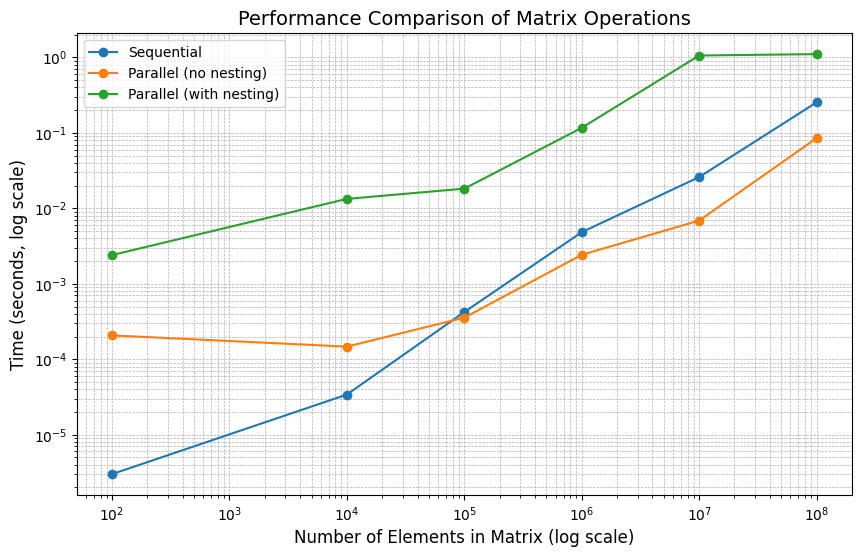

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
matrix_sizes = ['10x10', '100x100', '100x1000', '1000x1000', '10000x1000', '10000x10000']
sequential_times = [3.00002e-6, 3.4e-5, 0.000422, 0.00483, 0.025968, 0.253943]
parallel_no_nesting_times = [0.000207, 0.000147, 0.000356, 0.002422, 0.006883, 0.085217]
parallel_with_nesting_times = [0.002404, 0.013352, 0.018239, 0.116811, 1.06173, 1.10753]

# Convert matrix sizes to a more meaningful numerical representation (number of elements)
num_elements = np.array([10 * 10, 100 * 100, 100 * 1000, 1000 * 1000, 10000 * 1000, 10000 * 10000])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(num_elements, sequential_times, marker='o', label="Sequential")
plt.plot(num_elements, parallel_no_nesting_times, marker='o', label="Parallel (no nesting)")
plt.plot(num_elements, parallel_with_nesting_times, marker='o', label="Parallel (with nesting)")

# Log scale for better visualization of time differences
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel("Number of Elements in Matrix (log scale)", fontsize=12)
plt.ylabel("Time (seconds, log scale)", fontsize=12)
plt.title("Performance Comparison of Matrix Operations", fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Show plot
plt.show()


In [15]:
matrix_sizes = ['10x10', '100x100', '1000x1000', '10000x10000']
sequential_times = [3.00002e-6, 3.4e-5, 0.00483, 0.253943]
parallel_no_nesting_times = [0.000207, 0.000147, 0.002422, 0.085217]
parallel_with_nesting_times = [0.002404, 0.013352, 0.116811, 1.10753]


speedup = [nesting_times / no_nesting_times for nesting_times, no_nesting_times in zip(parallel_with_nesting_times, parallel_no_nesting_times)]

# Create a DataFrame for better visualization
data = pd.DataFrame({
    "Matrix Size": matrix_sizes,
    "Sequential Time (s)": sequential_times,
    "Parallel Time no nesting (s)": parallel_no_nesting_times,
    "Parallel Time nesting (s)": parallel_with_nesting_times,
    "Speedup (nesting vs no nesting)": speedup
})

data

,Matrix Size,Sequential Time (s),Parallel Time no nesting (s),Parallel Time nesting (s),Speedup (nesting vs no nesting)
0,10x10,0.000003,0.000207,0.002404,11.613527
1,100x100,0.000034,0.000147,0.013352,90.829932
2,1000x1000,0.004830,0.002422,0.116811,48.229149
3,10000x10000,0.253943,0.085217,1.107530,12.996585


**Вывод**
- Алгоритм без вложенного параллелизма показывает большую производительность при больших размерах матрицы, чем другие алгоритмы.
- Алгоритм с вложенным параллелизмом самый медленный из данных алгоритмов, что может быть связано с дополнительным накладными расходами при распараллеливании